# 1610 - Preparing results

In [1]:
# Imports
import sys
import os
import time
import math
import random

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Plotting import
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import the utils for plotting the metrics
from plot_utils import plot_utils
from plot_utils import notebook_utils_2

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [2]:
# Fix the colour scheme for each particle type
color_dict = {"gamma":"red", "e":"blue", "mu":"green"}

# Fix the numpy seed
np.random.seed(42)

In [60]:
def plot_log(dump_dirs, model_ids, model_cls, keys, log=False, lgd_loc=(0.8,0.5), show=False, save_path=None):
    """Generic method for plotting the logs for any model
    
    Args:
    dump_dirs -- Dumps directories for each run
    model_ids -- Names of the models for which the log is being plotted
    model_cls -- Two colors for each model for one axis on each size of the plot
    keys      -- Two keys for columns in the dataframe to plot
    log       -- Boolean to determine whether to use (log scaling) or not
    lgd_loc   -- Tuple to determine the location of the legend
    show      -- Boolean to determine whether to call plt.show()
    save_path -- Absolute path of the location at which to save the plot
    """
    
    # Defensive assertions to prevent Nonetype error
    assert dump_dirs is not None
    assert model_ids is not None
    assert model_cls is not None
    
    # Defensive assertion to prevent breaking function usage
    assert len(dump_dirs) == len(model_ids)
    assert len(model_ids) == len(model_cls)
    assert len(keys) == 2
    
    # Extract the values stored in the .csv files
    train_epochs = []
    val_epochs = []
    
    train_0 = []
    train_1 = []
    
    val_0 = []
    val_1 = []
    
    # Iterate over the logs for all the models
    for dump_dir in dump_dirs:
        
        train_log_path = dump_dir + "/log_train.csv"
        val_log_path = dump_dir + "/log_val.csv"
        
        if os.path.exists(train_log_path) and os.path.exists(val_log_path):
            train_log_df = pd.read_csv(train_log_path, usecols=["epoch",keys[0],keys[1]])
            val_log_df = pd.read_csv(val_log_path, usecols=["epoch",keys[0],keys[1]])
            
        train_epochs.append(train_log_df["epoch"].values)
        train_0.append(train_log_df[keys[0]].values)
        train_1.append(train_log_df[keys[1]].values)
        
        val_epochs.append(val_log_df["epoch"].values)
        val_0.append(val_log_df[keys[0]].values)
        val_1.append(val_log_df[keys[1]].values)
     
    # Initialize the plot
    fig, ax1 = plt.subplots(figsize=(16,11))
    ax2 = ax1.twinx()
    
    # Print the mpl rcParams
    mpl.rcParams['agg.path.chunksize']=1e12
    
    # Reload the backend
    mpl.use(mpl.get_backend())
    
    for i, model_ids in enumerate(model_ids):
            ax1.plot(train_epochs[i], train_0[i], color=model_cls[i][0], alpha=0.3, linewidth=2.0)
            ax2.plot(train_epochs[i], train_1[i], color=model_cls[i][1], alpha=0.3, linewidth=2.0)
            
            ax1.plot(val_epochs[i], val_0[i], color=model_cls[i][0], label=model_ids+" "+keys[0], alpha=1.0,
                     linewidth=0.5)
            ax2.plot(val_epochs[i], val_1[i], color=model_cls[i][1], label=model_ids+" "+keys[1], alpha=1.0,
                     linewidth=0.5)
    
    if log:
        ax1.set_yscale("log")
        ax2.set_yscale("log")
    
    # Setup plot characteristics
    ax1.tick_params(axis="x", labelsize=30)
    ax1.set_xlabel("Epoch", fontsize=30)
    
    ax1.set_ylabel(keys[0], fontsize=30, color=model_colors[0][0])
    ax1.tick_params(axis="y", labelsize=30, color=model_colors[0][0])
    
    ax2.set_ylabel(keys[1], fontsize=30, color=model_colors[0][1])
    ax2.tick_params(axis="y", labelsize=30, color=model_colors[0][1])
    
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    
    lgd = plt.legend(lines1 + lines2, labels1 + labels2, prop={"size":30},
                     loc="upper right", bbox_to_anchor=(1.6, 1.0), frameon=True,
                     fancybox=True, shadow=True)
    
    ax1.grid(True, which="both", axis="both")
    ax2.grid(True, which="both", axis="both")
    
    plt.margins(0.2)
    
    if save_path is not None:
        plt.savefig(save_path, format='pdf', dpi=600, bbox_extra_artists=(lgd))
    if show:
        try:
            plt.show()
        except:
            print("plot_log() : Unable to render the plot" 
                  + " due to limits on \'agg.path.chunksize\')")
            if save_path is None:
                print("plot_log() : Saving plot to ./{0}".format("vae_training_log.pdf"))
                plt.savefig("vae_training_log.eps", format='pdf', dpi=600, bbox_extra_artists=(lgd))
            plt.clf()
            plt.close()
    else:
        plt.clf()
        plt.close()
    

## Plot the training of LeNet-9 VAE

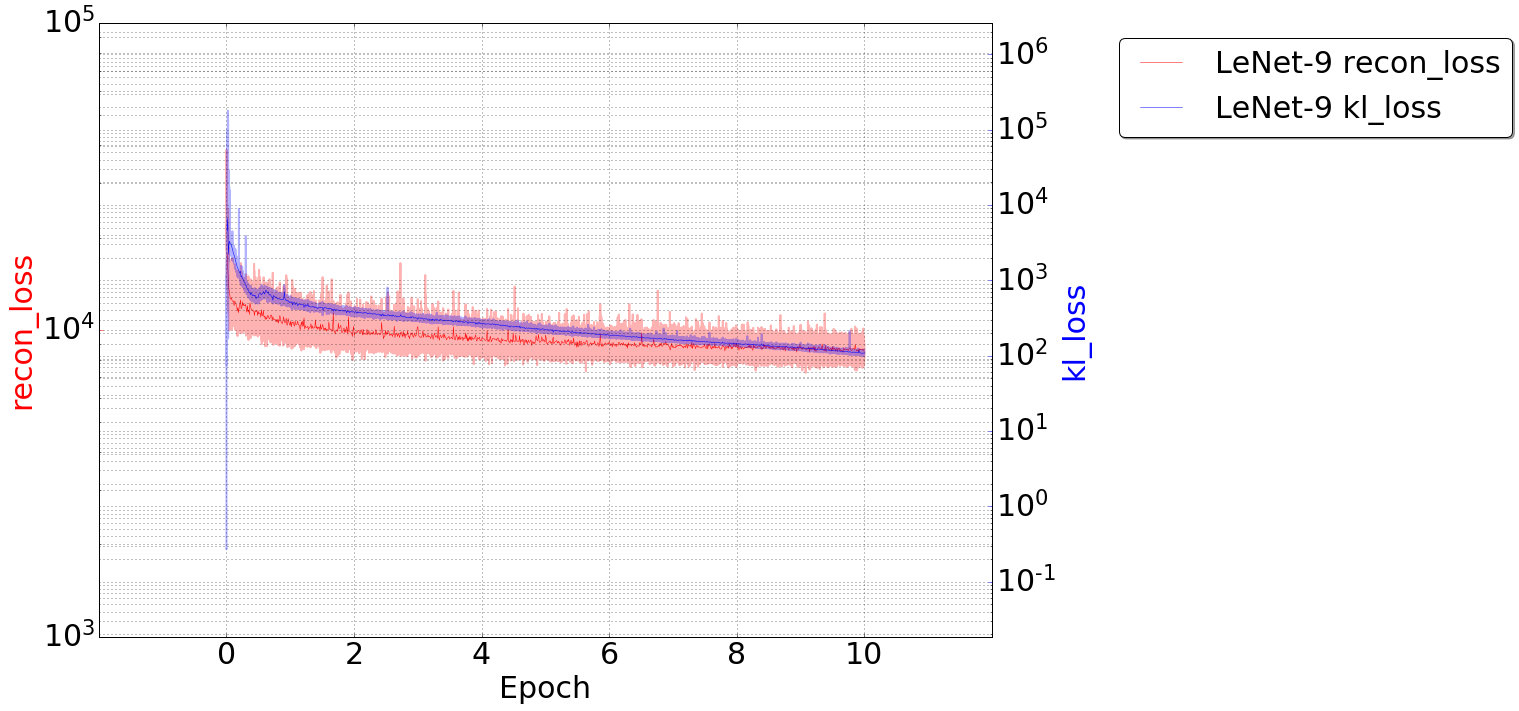

In [61]:
run_ids = ["/home/akajal/WatChMaL/VAE/dumps/20191013_174842"]
model_ids = ["LeNet-9"]
model_colors = [("red", "blue")]
keys = ["recon_loss", "kl_loss"]

plot_log(run_ids, model_ids, model_colors, keys, log=True, show=True)

## Plot the training of the M2 model

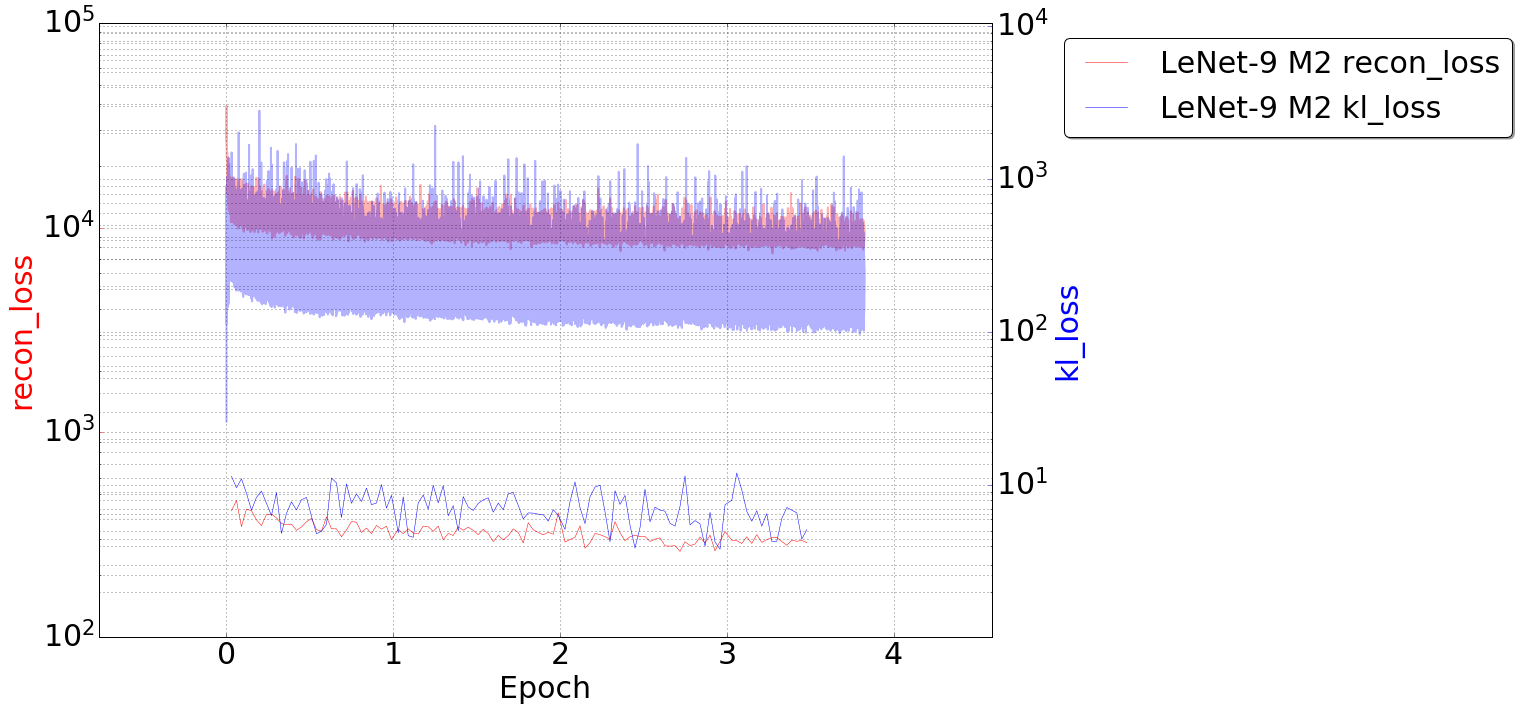

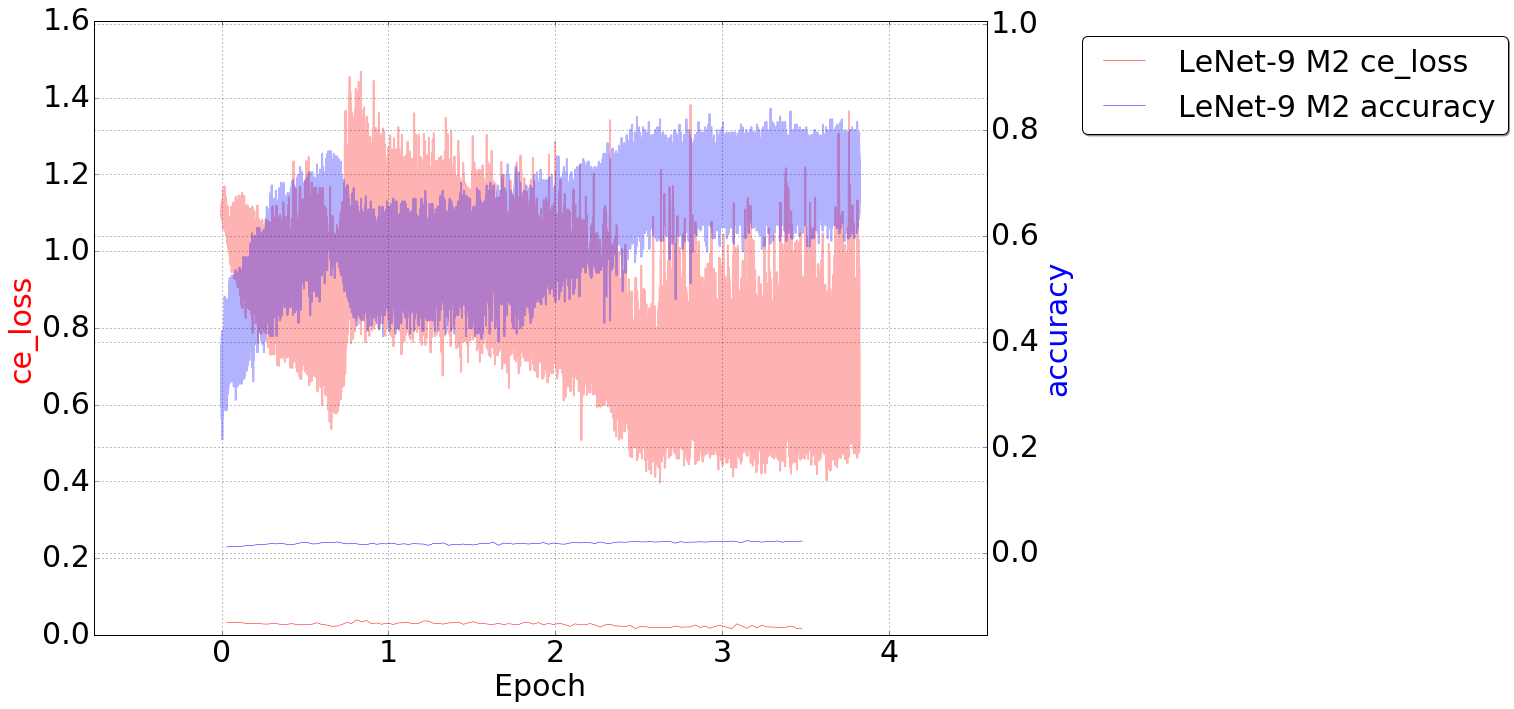

In [64]:
run_ids = ["/home/akajal/WatChMaL/VAE/dumps/20191016_022509"]
model_ids = ["LeNet-9 M2"]
model_colors = [("red", "blue")]

vae_keys = ["recon_loss", "kl_loss"]
cl_keys = ["ce_loss", "accuracy"]

plot_log(run_ids, model_ids, model_colors, vae_keys, log=True, show=True)
plot_log(run_ids, model_ids, model_colors, cl_keys, log=False, show=True)

The issue with the validation plot is coming from the 